# Modulo 2
En este notebook se realiza el calculo de las emisiones.
Se utilizan los VKT desde el programa de Nicolásy se multiplican por los factores de emisión obtenidos por COPERT5.5

In [2]:
import pandas as pd
import qgrid
from itables import init_notebook_mode
init_notebook_mode(all_interactive=False)
pd.options.mode.chained_assignment = None  # default='warn'
import numpy as np
import itables.options as opt

opt.lengthMenu = [2, 5, 10, 20, 50, 100, 200, 500]
opt.maxBytes = 2 ** 200

<IPython.core.display.Javascript object>

In [14]:
df = pd.read_excel("Modulo 2/VKT.xlsx", index_col=None)
df_vkt2 = pd.read_excel("Modulo 2/VKT_2.xlsx", index_col=None)
PM_NE = pd.read_excel("Modulo 2/EF_BreakTyreWear.xlsx", index_col=None)
PM_NE_R = pd.read_excel("Modulo 2/EF_RoadWear.xlsx", index_col=None)
EF = pd.read_excel("EF.xlsx", index_col=None)
EF = EF.replace(["R01","R02","R03","R04","R05","R06","R07","R08","R09"], ["R1","R2","R3","R4","R5","R6","R7","R8","R9"])

In [15]:
df_2 = df_vkt2.iloc[:,2:]
df_2.drop("2013", inplace=True, axis=1)
df_2 = df_2.replace(["R01","R02","R03","R04","R05","R06","R07","R08","R09"], ["R1","R2","R3","R4","R5","R6","R7","R8","R9"])
df_2["Región"].unique()

array(['R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8', 'R9', 'R10', 'R11',
       'R12', 'R13', 'R14', 'R15'], dtype=object)

In [16]:
#verificar los años de los VKT y los años de las velocidades, deben calzar
def merger(df1,df2):
    dfm = df1.merge(df2, left_on=["Región", "Ámbito", "Categoría", "Motorizacion", "Norma"], right_on=["Region", "Ambito", "Modo", "Motorizacion", "Norma"], how="left")
    dfm = dfm.fillna(0)
    df_f = pd.DataFrame(dfm.loc[:,"2014_x":"2050"].values*dfm.loc[:,"2014_y":2050].values, columns=dfm.iloc[:,48:85].columns, index=dfm.index)
    df_f = pd.concat([dfm.iloc[:,:6],df_f],axis=1)
    df_f.rename(columns = {'Unidad_x':'Unidad'}, inplace=True)
    df_f.rename(columns = {'2014_y':2014}, inplace=True)
    df_f["Unidad"]="[gr/año]"
    return df_f

In [17]:
EF_BC = EF.iloc[:,0:-10][EF["Pollutant"]=="BC"]
EF_CH4 = EF.iloc[:,0:-10][EF["Pollutant"]=="CH4"]
EF_CO = EF.iloc[:,0:-10][EF["Pollutant"]=="CO"]
EF_CO2 = EF.iloc[:,0:-10][EF["Pollutant"]=="CO2"]
EF_N2O = EF.iloc[:,0:-10][EF["Pollutant"]=="N2O"]
EF_NH3 = EF.iloc[:,0:-10][EF["Pollutant"]=="NH3"]
EF_NO = EF.iloc[:,0:-10][EF["Pollutant"]=="NO"]
EF_NO2 = EF.iloc[:,0:-10][EF["Pollutant"]=="NO2"]
EF_NOx = EF.iloc[:,0:-10][EF["Pollutant"]=="NOx"]
EF_PM = EF.iloc[:,0:-10][EF["Pollutant"]=="PM"]
EF_SOx = EF.iloc[:,0:-10][EF["Pollutant"]=="SOx"]
EF_VOC = EF.iloc[:,0:-10][EF["Pollutant"]=="VOC"]

In [18]:
dfm = df_2.merge(EF_CO, left_on=["Región", "Ámbito", "Categoría", "Motorizacion", "Norma"], right_on=["Region", "Ambito", "Modo", "Motorizacion", "Norma"], how="left")
dfm=dfm.fillna(0)
df_CO = pd.DataFrame(dfm.iloc[:,6:43].values*dfm.loc[:,"2014_y":2050].values, columns=dfm.iloc[:,48:85].columns, index=dfm.index)
df_CO = pd.concat([dfm.iloc[:,:6],df_CO],axis=1)
df_CO.rename(columns = {'Unidad_x':'Unidad'}, inplace=True)
df_CO.rename(columns = {'2014_y':2014}, inplace=True)
df_CO["Unidad"]="[gr/año]"
df_CO
EM_BC = merger(df_2,EF_BC)
EM_CH4 = merger(df_2,EF_CH4)
EM_CO = merger(df_2,EF_CO)
EM_CO2 = merger(df_2,EF_CO2)
EM_N2O = merger(df_2,EF_N2O)
EM_NH3 = merger(df_2,EF_NH3)
EM_NO = merger(df_2,EF_NO)
EM_NO2 = merger(df_2,EF_NO2)
EM_NOx = merger(df_2,EF_NOx)
EM_PM = merger(df_2,EF_PM)
EM_SOx = merger(df_2,EF_SOx)
EM_VOC = merger(df_2,EF_VOC)
#EM_NO.iloc[:,6:].sum() + EM_NO2.iloc[:,6:].sum() - EM_NOx.iloc[:,6:].sum() #<-consistente


In [20]:
writer = pd.ExcelWriter('Emisiones 2020.xlsx')
EM_BC.to_excel(writer,'BC')
EM_CH4.to_excel(writer,'CH4')
EM_CO.to_excel(writer,'CO')
EM_CO2.to_excel(writer,'CO2')
EM_N2O.to_excel(writer,'N2O')
EM_NH3.to_excel(writer,'NH3')
EM_NO.to_excel(writer,'NO')
EM_NO2.to_excel(writer,'NO2')
EM_NOx.to_excel(writer,'NOx')
EM_PM.to_excel(writer,'PM2.5')
EM_SOx.to_excel(writer,'SOx')
EM_VOC.to_excel(writer,'VOC')
writer.save()

In [87]:
# Calculo Emisiones Non_Exhaust (Brake, Wheel,Surface)
df_2
PM_NE
PM_NE_R
df_m = df_2.merge(PM_NE, left_on=["Categoría", "Motorizacion", "Norma"], right_on=["Modo", "Motorizacion", "Norma"], how="left")
df_m=df_m.fillna(0)
df_PMNE = pd.DataFrame(df_m.iloc[:,6:43].values*df_m.loc[:,"2014_y":2050].values,columns=df_m.iloc[:,6:43].columns ,index=df_m.index)
df_PMNE = pd.concat([df_m.iloc[:,:6],df_PMNE],axis=1)
df_PMNE.rename(columns = {'2014_x':2014}, inplace=True)
df_PMNE["Unidad"]="[gr/año]"
df_PMNE.to_excel("PM_BreakTyreWear.xlsx",index=False)

In [88]:
df_m = df_2.merge(PM_NE_R, left_on=["Categoría", "Motorizacion", "Norma"], right_on=["Modo", "Motorizacion", "Norma"], how="left")
df_m=df_m.fillna(0)
df_PMNE = pd.DataFrame(df_m.iloc[:,6:43].values*df_m.loc[:,"2014_y":2050].values,columns=df_m.iloc[:,6:43].columns ,index=df_m.index)
df_PMNE = pd.concat([df_m.iloc[:,:6],df_PMNE],axis=1)
df_PMNE.rename(columns = {'2014_x':2014}, inplace=True)
df_PMNE["Unidad"]="[gr/año]"
df_PMNE.to_excel("PM_SurfaceWear.xlsx",index=False)

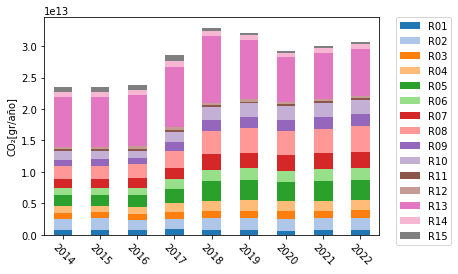

In [134]:
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
import seaborn as sns
colrs = sns.color_palette("tab20")
column_to_melt = EM_CO2.columns[6:15]
df = pd.melt(EM_CO2, id_vars=["Región"], value_vars=column_to_melt)
df = df.groupby(["Región","variable"],as_index=False).sum()
df = df.pivot(index='variable', columns='Región', values='value')
#ax.bar(df.index.values,)
df.plot(kind="bar",stacked=True, color=colrs)
plt.xticks(rotation=-45)
plt.ylabel('CO\u2082[gr/año]') #subíndice \u208x donde x es número
plt.xlabel(None)
plt.legend(bbox_to_anchor=(1.05, 1),loc='upper left', borderaxespad=0.)

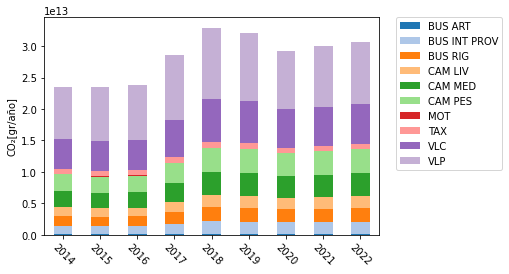

In [132]:
df = pd.melt(EM_CO2, id_vars=["Categoría"], value_vars=column_to_melt)
df = df.groupby(["Categoría","variable"],as_index=False).sum()
df = df.pivot(index='variable', columns='Categoría', values='value')
#ax.bar(df.index.values,)
df.plot(kind="bar",stacked=True, color=colrs)
plt.xticks(rotation=-45)
plt.ylabel('CO\u2082[gr/año]') #subíndice \u208x donde x es número
plt.xlabel(None)
plt.legend(bbox_to_anchor=(1.05, 1),loc='upper left', borderaxespad=0.)